<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<AxesSubplot:ylabel='AGE'>

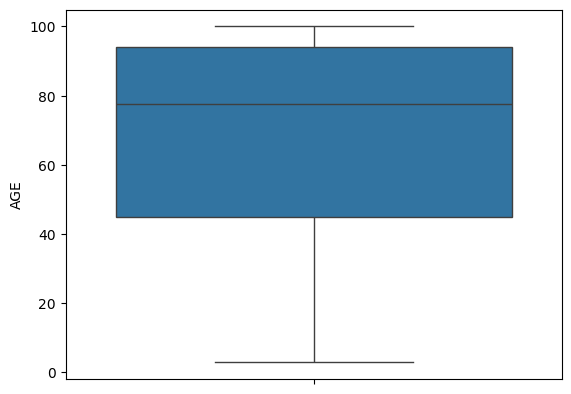

In [18]:
sns.boxplot(data=boston_df.AGE)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

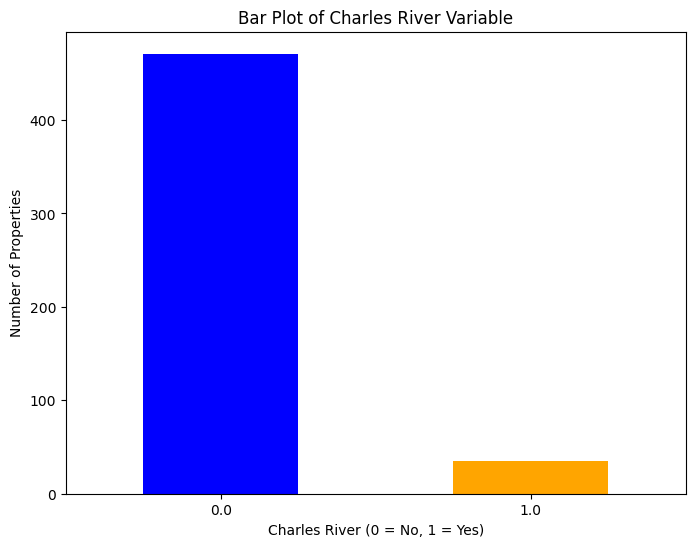

In [21]:
charles_river = boston_df['CHAS']

# Count the occurrences of each value (0 and 1)
counts = charles_river.value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Number of Properties')
plt.xticks(rotation=0)

<Figure size 1200x800 with 0 Axes>

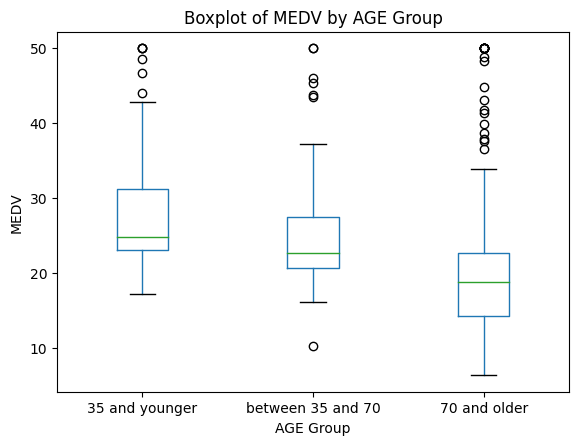

In [26]:
age_bins = [0, 35, 70,boston_df['AGE'].max()]
age_labels = ['35 and younger', 'between 35 and 70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Create the boxplot
plt.figure(figsize=(12, 8))
boston_df.boxplot(column='MEDV', by='AGE_group', grid=False)
plt.title('Boxplot of MEDV by AGE Group')
plt.suptitle('')  # Suppress the default title to show the custom title only
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

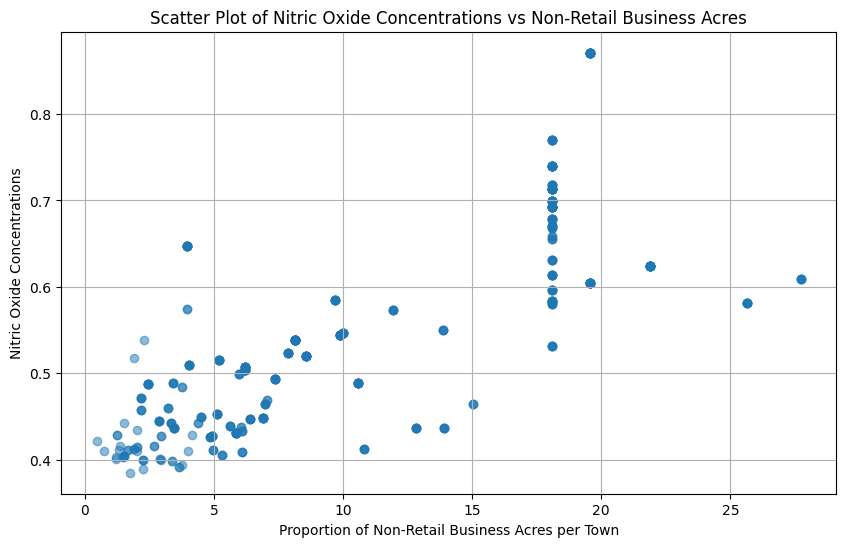

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(  boston_df.INDUS, boston_df.NOX, alpha=0.5)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentrations')
plt.grid(True)
plt.show()

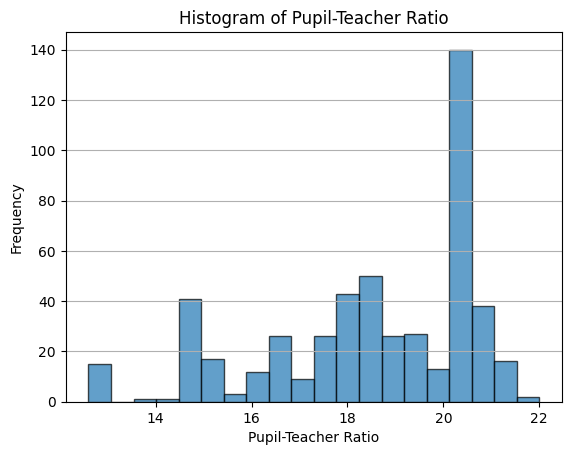

In [34]:
plt.hist(boston_df.PTRATIO,bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [54]:
#Is there a significant difference in median value of houses 
#bounded by the Charles river or not? (T-test for independent samples)


import scipy.stats
#H0: The median value of houses bound by charles river = The median value of houses not bound by charles river
#H1 : The median value of houses bound by charles river != The median value of houses not bound by charles river



#charles_river = boston_df['CHAS']
#medv = boston_df['MEDV']


medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']


st.levene(medv_river,medv_no_river)


LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [51]:
# Perform the independent samples t-test
st.ttest_ind(medv_river, medv_no_river, equal_var=True)  

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [53]:
#Pvalue < alpha -> reject null hypothesis
# The median value of house bound by charles river is different from the houses not bound by charles river

In [58]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built 
#prior to 1940 (AGE)? (ANOVA)

#H0 : There is no significant difference in the median values of houses for different AGE groups.
#h1 : There is a significant difference in the median values of houses for different AGE groups.

age_bins = [0, 33, 66, 100]
age_labels = ['Low', 'Medium', 'High']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Separate the data into groups based on AGE
medv_low = boston_df[boston_df['AGE_group'] == 'Low']['MEDV']
medv_medium = boston_df[boston_df['AGE_group'] == 'Medium']['MEDV']
medv_high = boston_df[boston_df['AGE_group'] == 'High']['MEDV']

# Perform the ANOVA test
f_stat, p_value = st.f_oneway(medv_low, medv_medium, medv_high)

# Report the results
print(f'F-statistic: {f_stat:.3f}')
print(f'P-value: {p_value:.3f}')

if p_value < 0.05:
    print('There is a significant difference in the median values of houses for different AGE groups; Reject null Hypothesis')
else:
    print('There is no significant difference in the median values of houses for different AGE groups. Failure to reject null hypothesis')

F-statistic: 27.105
P-value: 0.000
There is a significant difference in the median values of houses for different AGE groups; Reject null Hypothesis


In [62]:
nitric_oxide = boston_df['NOX']
non_retail_acres = boston_df['INDUS']



# H0 :  There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

# H1 :There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


# Calculate the Pearson correlation coefficient and the p-value
correlation_coefficient, p_value = st.pearsonr(nitric_oxide, non_retail_acres)

# Report the results
print(f'Pearson correlation coefficient: {correlation_coefficient:.3f}')
print(f'P-value: {p_value:.3f}')

if p_value < 0.05:
    print('There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town; Reject of null Hypothesis')
else:
    print('There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. Fail to reject Null hypothesis')

Pearson correlation coefficient: 0.764
P-value: 0.000
There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town; Reject of null Hypothesis


In [63]:
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Perform the linear regression analysis
model = sm.OLS(y, X).fit()

# Get the regression results
results = model.summary()
print(results)

# Interpretation
coef = model.params['DIS']
p_value = model.pvalues['DIS']
r_squared = model.rsquared

print(f'Coefficient for DIS: {coef:.3f}')
print(f'P-value for DIS: {p_value:.3f}')
print(f'R-squared: {r_squared:.3f}')

if p_value < 0.05:
    print('The impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes is statistically significant.')
else:
    print('The impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes is not statistically significant.')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        17:04:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0